<a href="https://colab.research.google.com/github/manpoffc/ML-projects/blob/master/MovieRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [666]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

In [667]:
movie= pd.read_csv("/content/tmdb_5000_movies.csv")
credits= pd.read_csv("/content/tmdb_5000_credits.csv")

In [668]:
movie= movie.fillna("")

In [669]:
credits=credits.fillna("")

In [670]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [671]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              4803 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4803 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4803 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4803 non-null   object 
 14  spoken_languages      4803 non-null   object 
 15  status               

In [672]:
credits.rename(columns = {'movie_id':'id'}, inplace = True)

In [673]:
new_movie= movie.merge(credits,on="id")

In [674]:
new_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              4803 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4803 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4803 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4803 non-null   object 
 14  spoken_languages      4803 non-null   object 
 15  status               

In [675]:
new_movie.isna()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4799,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4800,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4801,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [676]:

def genreRef():
  for index, value in zip(new_movie.index, new_movie['genres']):
    length= len(value)
    final_values=[]
    for values in range(length):
      decons=(value[values]['name'])
      final_values.append(decons)
    final_values=str(final_values)
    new_movie.loc[index,'genres']= final_values



In [677]:
new_movie['genres'] = new_movie['genres'].apply(json.loads)
genreRef()

In [678]:
new_movie

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"['Action', 'Crime', 'Thriller']",,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"['Comedy', 'Romance']",,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,0,"['Comedy', 'Drama', 'Romance', 'TV Movie']

In [679]:
def keywordRef():
  for index, value in zip(new_movie.index, new_movie['keywords']):
    length= len(value)
    final_values=[]
    for values in range(len(value)):
      decons=(value[values]['name'])
      final_values.append(decons)
    final_values=str(final_values)
    new_movie.loc[index,'keywords']= final_values
  

In [680]:
new_movie['keywords'] = new_movie['keywords'].apply(json.loads)
keywordRef()

In [681]:
new_movie

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"['Action', 'Crime', 'Thriller']",,9367,"['united states–mexico barrier', 'legs', 'arms...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"['Comedy', 'Romance']",,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,0,"['Comedy', 'Drama', 'Romance', 'TV Movie']",http://www.hallmarkchannel.com/signedsealedde

In [682]:
def director():
  for index, value in zip(new_movie.index, new_movie['director']):
    for values in range(len(value)):
      if value[values]['job']=="Director":
        new_movie.loc[index,'director']= (value[values]['name'])
    

In [683]:
new_movie['director'] = new_movie['crew'].apply(json.loads)
director()

In [684]:
new_movie['director']

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4          Andrew Stanton
              ...        
4798     Robert Rodriguez
4799         Edward Burns
4800          Scott Smith
4801          Daniel Hsia
4802           Brett Winn
Name: director, Length: 4803, dtype: object

In [685]:
new_movie.isnull()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4799,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4800,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4801,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [686]:
def casts():
  for index, value in zip(new_movie.index, new_movie['cast']):
    length= len(value)
    final_values=[]
    for values in range(length):
      decons=(value[values]['name'])
      final_values.append(decons)
    final_values=str(final_values)
    new_movie.loc[index,'cast']= str(final_values)

In [687]:
new_movie['cast'] = new_movie['cast'].apply(json.loads)
casts()

In [688]:
new_movie['cast'][1]

"['Johnny Depp', 'Orlando Bloom', 'Keira Knightley', 'Stellan Skarsgård', 'Chow Yun-fat', 'Bill Nighy', 'Geoffrey Rush', 'Jack Davenport', 'Kevin McNally', 'Tom Hollander', 'Naomie Harris', 'Jonathan Pryce', 'Keith Richards', 'Lee Arenberg', 'Mackenzie Crook', 'Greg Ellis', 'David Bailie', 'Martin Klebba', 'David Schofield', 'Lauren Maher', 'Vanessa Branch', 'Angus Barnett', 'Giles New', 'Reggie Lee', 'Dominic Scott Kay', 'Takayo Fischer', 'David Meunier', 'Ho-Kwan Tse', 'Andy Beckwith', 'Peter Donald Badalamenti II', 'Christopher S. Capp', 'Keith Richards', 'Hakeem Kae-Kazim', 'Ghassan Massoud']"

In [689]:
new_movie[['title_x','cast','director','keywords','genres']].head()

,title_x,cast,director,keywords,genres
0,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron,"['culture clash', 'future', 'space war', 'spac...","['Action', 'Adventure', 'Fantasy', 'Science Fi..."
1,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski,"['ocean', 'drug abuse', 'exotic island', 'east...","['Adventure', 'Fantasy', 'Action']"
2,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes,"['spy', 'based on novel', 'secret agent', 'seq...","['Action', 'Adventure', 'Crime']"
3,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan,"['dc comics', 'crime fighter', 'terrorist', 's...","['Action', 'Crime', 'Drama', 'Thriller']"
4,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton,"['based on novel', 'mars', 'medallion', 'space...","['Action', 'Adventure', 'Science Fiction']"


In [690]:
new_movie['cast'][0]

"['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Stephen Lang', 'Michelle Rodriguez', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence', 'Kelly Kilgour', 'James Patrick Pitt', 'Sean Patrick Murphy', 'Peter Dillon', 'Kevin Dorman', 'Kelson Henderson', 'David Van Horn', 'Jacob Tomuri', 'Michael Blain-Rozgay', 'Jon Curry', 'Luke Hawker', 'Woody Schultz', 'Peter Mensah', 'Sonia Yee', 'Jahnel Curfman', 'Ilram Choi', 'Kyla Warren', 'Lisa Roumain', 'Debra Wilson', 'Chris Mala', 'Taylor Kibby', 'Jodie Landau', 'Julie Lamm', 'Cullen B. Madden', 'Joseph Brady Madden', 'Frankie Torres', 'Austin Wilson', 'Sara Wilson', 'Tamica Washington-Miller', 'Lucy Briant', 'Nathan Meister', 'Gerry Blair', 'Matthew Chamberlain', 'Paul Yates', 'Wray Wilson', 'James Gaylyn', 'Melvin Leno Clark III', 'Carvon Futrell', 'Brandon Jelkes', 'Micah Moch', 'Hanniyah Muhammad', 'Christopher Nolen', 'C

In [691]:
str.lower(new_movie['cast'][0])


"['sam worthington', 'zoe saldana', 'sigourney weaver', 'stephen lang', 'michelle rodriguez', 'giovanni ribisi', 'joel david moore', 'cch pounder', 'wes studi', 'laz alonso', 'dileep rao', 'matt gerald', 'sean anthony moran', 'jason whyte', 'scott lawrence', 'kelly kilgour', 'james patrick pitt', 'sean patrick murphy', 'peter dillon', 'kevin dorman', 'kelson henderson', 'david van horn', 'jacob tomuri', 'michael blain-rozgay', 'jon curry', 'luke hawker', 'woody schultz', 'peter mensah', 'sonia yee', 'jahnel curfman', 'ilram choi', 'kyla warren', 'lisa roumain', 'debra wilson', 'chris mala', 'taylor kibby', 'jodie landau', 'julie lamm', 'cullen b. madden', 'joseph brady madden', 'frankie torres', 'austin wilson', 'sara wilson', 'tamica washington-miller', 'lucy briant', 'nathan meister', 'gerry blair', 'matthew chamberlain', 'paul yates', 'wray wilson', 'james gaylyn', 'melvin leno clark iii', 'carvon futrell', 'brandon jelkes', 'micah moch', 'hanniyah muhammad', 'christopher nolen', 'c

In [692]:
new_movie

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",James Cameron
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Gore Verbinski
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Sam Mendes
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christopher Nolan
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"['Action', 'Crime', 'Thriller']",,9367,"['united states–mexico barrier', 'legs', 'arms...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"['Carlos Gallardo', 'Jaime de Hoyos', 'Peter M...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",Robert Rodriguez
4799,9000,"['Comedy', 'Romance']",,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"['Edward Burns', 'Kerry Bishé', 'Marsha Dietle...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",Edward Burns
4800,0,"['Comedy', 'Drama', 'Romance', 'TV Movie']",http://www.hallmarkchannel

In [693]:
new_movie["keywordPool"] = pd.NaT

In [694]:
new_movie

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director,keywordPool
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",James Cameron,NaT
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Gore Verbinski,NaT
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Sam Mendes,NaT
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christopher Nolan,NaT
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Andrew Stanton,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"['Action', 'Crime', 'Thriller']",,9367,"['united states–mexico barrier', 'legs', 'arms...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"['Carlos Gallardo', 'Jaime de Hoyos', 'Peter M...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",Robert Rodriguez,NaT
4799,9000,"['Comedy', 'Romance']",,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"['Edward Burns', 'Kerry Bishé', 'Marsha Dietle...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",Edward Burns,NaT
4800,0,"['Comedy', 'Drama', 'Romance', 'TV Movie']",http://www.hallmarkchannel.com/signedsealeddel...,231617,"['date', 'love at first sight', 'narration', '...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,Released,,"Signed, Sealed, Delivered",7.0,6,"Signed, Sealed, Delivered"

In [695]:
type(new_movie['keywords'])

pandas.core.series.Series

In [696]:
new_movie['genres']=new_movie['genres'].str.lower()
new_movie['keywords']=new_movie['keywords'].str.lower()
new_movie['overview']=new_movie['overview'].str.lower()
new_movie['director']=new_movie['director'].str.lower()

In [697]:
new_movie

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director,keywordPool
0,237000000,"['action', 'adventure', 'fantasy', 'science fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"in the 22nd century, a paraplegic marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",james cameron,NaT
1,300000000,"['adventure', 'fantasy', 'action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",gore verbinski,NaT
2,245000000,"['action', 'adventure', 'crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,a cryptic message from bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",sam mendes,NaT
3,250000000,"['action', 'crime', 'drama', 'thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,following the death of district attorney harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",christopher nolan,NaT
4,260000000,"['action', 'adventure', 'science fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"john carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",andrew stanton,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"['action', 'crime', 'thriller']",,9367,"['united states–mexico barrier', 'legs', 'arms...",es,El Mariachi,el mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"['Carlos Gallardo', 'Jaime de Hoyos', 'Peter M...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",robert rodriguez,NaT
4799,9000,"['comedy', 'romance']",,72766,[],en,Newlyweds,a newlywed couple's honeymoon is upended by th...,0.642552,[],...,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"['Edward Burns', 'Kerry Bishé', 'Marsha Dietle...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",edward burns,NaT
4800,0,"['comedy', 'drama', 'romance', 'tv movie']",http://www.hallmarkchannel.com/signedsealeddel...,231617,"['date', 'love at first sight', 'narration', '...",en,"Signed, Sealed, Delivered","""signed, sealed, delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,Released,,"Signed, Sealed, Delivered",7.0,6,"Signed, Sealed, Delivered"

In [709]:
def getWords(new_movie):
  param_cast= str(''.join(new_movie['overview']))
  param_keywords=str(''.join(new_movie['keywords']))
  param_overview=str(''.join(new_movie['cast']))
  final_string= param_cast + param_keywords + param_overview
  return final_string
new_movie['keywordPool']= new_movie.apply(getWords,axis=1)

new_movie['keywordPool'][1]

In [710]:
def getCountMatrix(data,pool):
  countVector= CountVectorizer()
  count_matrix= countVector.fit_transform(data[pool])
  cos_similarity= cosine_similarity(count_matrix)
  return cos_similarity


In [711]:
similarity = getCountMatrix(new_movie,'keywordPool')

In [712]:
def getIndexOfMovie(data,movie_name):
  return data.index[data['title_x'] == movie_name][0]

In [713]:
def getMovieTitle(data,index_ofMovie):
  title= data.iloc[index_ofMovie]
  return title['title_x']

In [714]:
def getmovie_list(i):
  movies= list(enumerate(similarity[i]))
  return sorted(movies, key = lambda x: x[1],reverse=True)


In [715]:
def getMovieList(data,movie):
  idx= getIndexOfMovie(data,movie)
  final_movie= getmovie_list(idx)
  reccomend= final_movie[1:6]
  return reccomend

In [716]:
def reccomendations(movie_list):
  for value in movie_list:
    print(getMovieTitle(new_movie,value[0]))


In [719]:
movies= getMovieList(new_movie,'Iron Man')

In [720]:
rec= reccomendations(movies)

Iron Man 3
Iron Man 2
The Avengers
The Incredible Hulk
Avengers: Age of Ultron


In [178]:
new_movie.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director,keywordPool
0,237000000,"['action', 'adventure', 'fantasy', 'science fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"in the 22nd century, a paraplegic marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",james cameron,"in the 22nd century, a paraplegic marine is di..."
1,300000000,"['adventure', 'fantasy', 'action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",gore verbinski,"captain barbossa, long believed to be dead, ha..."


In [179]:
df1 = new_movie.sort_values(by=['budget']).tail(10)


In [183]:
df1['revenue']

46     747862775
3     1084939099
13      89289910
5      890871626
6      591794936
4      284139100
10     391081192
7     1405403694
1      961000000
17    1045713802
Name: revenue, dtype: int64

**TOP 10 Movies w.r.t Budget**

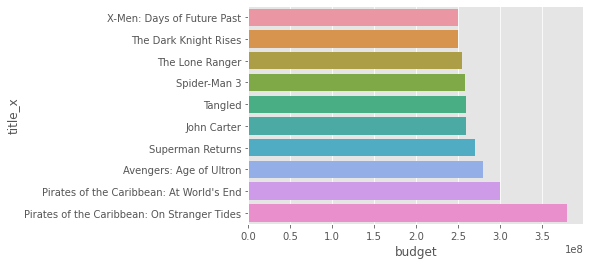

In [181]:
sns.barplot(data=df1,x=df1['budget'],y=df1['title_x'])


In [187]:
new_movie['profit']=  new_movie['revenue'] - new_movie['budget'] 

In [189]:
df2 = new_movie.sort_values(by=['profit']).tail(10)

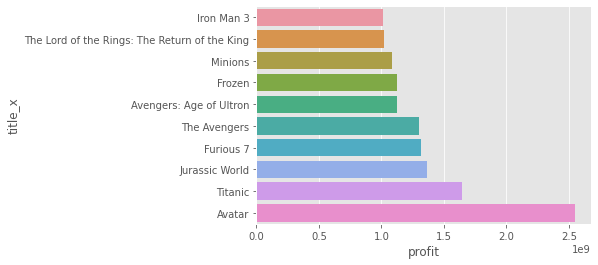

In [454]:
sns.barplot(data=df2,x=df2['profit'],y=df2['title_x'])


**TOP 10 Profitable Movies**

In [191]:
new_movie

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director,keywordPool,profit
0,237000000,"['action', 'adventure', 'fantasy', 'science fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"in the 22nd century, a paraplegic marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",james cameron,"in the 22nd century, a paraplegic marine is di...",2550965087
1,300000000,"['adventure', 'fantasy', 'action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",gore verbinski,"captain barbossa, long believed to be dead, ha...",661000000
2,245000000,"['action', 'adventure', 'crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,a cryptic message from bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",sam mendes,a cryptic message from bond’s past sends him o...,635674609
3,250000000,"['action', 'crime', 'drama', 'thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,following the death of district attorney harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",christopher nolan,following the death of district attorney harve...,834939099
4,260000000,"['action', 'adventure', 'science fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"john carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",andrew stanton,"john carter is a war-weary, former military ca...",24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"['action', 'crime', 'thriller']",,9367,"['united states–mexico barrier', 'legs', 'arms...",es,El Mariachi,el mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"['Carlos Gallardo', 'Jaime de Hoyos', 'Peter M...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",robert rodriguez,el mariachi just wants to play his guitar and ...,1820920
4799,9000,"['comedy', 'romance']",,72766,[],en,Newlyweds,a newlywed couple's honeymoon is upended by th...,0.642552,[],...,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"['Edward Burns', 'Kerry Bishé', 'Marsha Dietle...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",edward burns,a newlywed couple's honeymoon is upended by th...,-9000
4800,0,"['comedy', 'drama', 'romance', 'tv movie']",http://

In [192]:
df3 = new_movie.sort_values(by=['popularity']).tail(10)

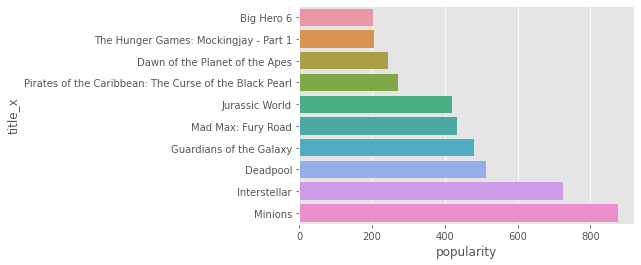

In [195]:
sns.barplot(data=df3,x=df3['popularity'],y=df3['title_x'])

TOP 10 Popular **Movies**

In [196]:
df3

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director,keywordPool,profit
88,165000000,"['adventure', 'family', 'animation', 'action',...",http://movies.disney.com/big-hero-6,177572,"['brother brother relationship', 'hero', 'tale...",en,Big Hero 6,the special bond that develops between plus-si...,203.734590,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,From the creators of Wreck-it Ralph and Frozen,Big Hero 6,7.8,6135,Big Hero 6,"['Scott Adsit', 'Ryan Potter', 'Daniel Henney'...","[{""credit_id"": ""537534e7c3a3681efb0002b3"", ""de...",don hall,the special bond that develops between plus-si...,487105443
200,125000000,"['science fiction', 'adventure', 'thriller']",http://www.thehungergames.movie/,131631,"['resistance', 'post-apocalyptic', 'dystopia',...",en,The Hunger Games: Mockingjay - Part 1,katniss everdeen reluctantly becomes the symbo...,206.227151,"[{""name"": ""Lionsgate"", ""id"": 1632}, {""name"": ""...",...,Fire burns brighter in the darkness,The Hunger Games: Mockingjay - Part 1,6.6,5584,The Hunger Games: Mockingjay - Part 1,"['Jennifer Lawrence', 'Josh Hutcherson', 'Liam...","[{""credit_id"": ""550a97e6c3a3684877000fbc"", ""de...",francis lawrence,katniss everdeen reluctantly becomes the symbo...,627100229
82,170000000,"['science fiction', 'action', 'drama', 'thrill...",http://www.dawnofapes.com/,119450,"['leader', 'colony', 'post-apocalyptic', 'dyst...",en,Dawn of the Planet of the Apes,a group of scientists in san francisco struggl...,243.791743,"[{""name"": ""Ingenious Media"", ""id"": 290}, {""nam...",...,One last chance for peace.,Dawn of the Planet of the Apes,7.3,4410,Dawn of the Planet of the Apes,"['Andy Serkis', 'Jason Clarke', 'Gary Oldman',...","[{""credit_id"": ""54c4d125c3a36814210139a5"", ""de...",matt reeves,a group of scientists in san francisco struggl...,540644566
199,140000000,"['adventure', 'fantasy', 'action']",http://disney.go.com/disneyvideos/liveaction/p...,22,"['exotic island', 'blacksmith', 'east india tr...",en,Pirates of the Caribbean: The Curse of the Bla...,"jack sparrow, a freewheeling 17th-century pira...",271.972889,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Prepare to be blown out of the water.,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,Pirates of the Caribbean: The Curse of the Bla...,"['Johnny Depp', 'Geoffrey Rush', 'Orlando Bloo...","[{""credit_id"": ""52fe420fc3a36847f8000f11"", ""de...",gore verbinski,"jack sparrow, a freewheeling 17th-century pira...",515011224
28,150000000,"['action', 'adventure', 'science fiction', 'th...",http://www.jurassicworld.com/,135397,"['monster', 'dna', 'tyrannosaurus rex', 'veloc...",en,Jurassic World,twenty-two years after the events of jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,The park is open.,Jurassic World,6.5,8662,Jurassic World,"['Chris Pratt', 'Bryce Dallas Howard', 'Irrfan...","[{""credit_id"": ""52fe4bf7c3a368484e1a0683"", ""de...",colin trevorrow,twenty-two years after the events of jurassic ...,1363528810
127,150000000,"['action', 'adventure', 'science fiction', 'th...",http://www.madmaxmovie.com/,76341,"['future', 'chase', 'post-apocalyptic', 'dysto...",en,Mad Max: Fury Road,an apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",...,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,Mad Max: Fury Road,"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de...",george miller,an apocalyptic story set in the furthest reach...,228858340
94,170000000,"['action', 'science fiction', 'adventure']",http://marvel.com/guardians,118340,"['marvel comic', 'spaceship', 'space', 'outer ...",en,Guardians of the Galaxy,"light years from earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 42

In [220]:
new_movie

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director,keywordPool,profit
0,237000000,"['action', 'adventure', 'fantasy', 'science fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"in the 22nd century, a paraplegic marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",james cameron,"in the 22nd century, a paraplegic marine is di...",2550965087
1,300000000,"['adventure', 'fantasy', 'action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",gore verbinski,"captain barbossa, long believed to be dead, ha...",661000000
2,245000000,"['action', 'adventure', 'crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,a cryptic message from bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",sam mendes,a cryptic message from bond’s past sends him o...,635674609
3,250000000,"['action', 'crime', 'drama', 'thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,following the death of district attorney harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",christopher nolan,following the death of district attorney harve...,834939099
4,260000000,"['action', 'adventure', 'science fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"john carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",andrew stanton,"john carter is a war-weary, former military ca...",24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"['action', 'crime', 'thriller']",,9367,"['united states–mexico barrier', 'legs', 'arms...",es,El Mariachi,el mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"['Carlos Gallardo', 'Jaime de Hoyos', 'Peter M...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",robert rodriguez,el mariachi just wants to play his guitar and ...,1820920
4799,9000,"['comedy', 'romance']",,72766,[],en,Newlyweds,a newlywed couple's honeymoon is upended by th...,0.642552,[],...,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"['Edward Burns', 'Kerry Bishé', 'Marsha Dietle...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",edward burns,a newlywed couple's honeymoon is upended by th...,-9000
4800,0,"['comedy', 'drama', 'romance', 'tv movie']",http://

In [223]:
df4 = new_movie.sort_values(by=['vote_count']).tail(10)
df4

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director,keywordPool,profit
127,150000000,"['action', 'adventure', 'science fiction', 'th...",http://www.madmaxmovie.com/,76341,"['future', 'chase', 'post-apocalyptic', 'dysto...",en,Mad Max: Fury Road,an apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",...,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,Mad Max: Fury Road,"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de...",george miller,an apocalyptic story set in the furthest reach...,228858340
426,75000000,"['science fiction', 'adventure', 'fantasy']",http://www.thehungergames.movie/,70160,"['hallucination', 'dystopia', 'female protagon...",en,The Hunger Games,every year in the ruins of what was once north...,68.550698,"[{""name"": ""Lionsgate"", ""id"": 1632}, {""name"": ""...",...,May The Odds Be Ever In Your Favor.,The Hunger Games,6.9,9455,The Hunger Games,"['Jennifer Lawrence', 'Josh Hutcherson', 'Liam...","[{""credit_id"": ""52fe47edc3a368484e0e0d2d"", ""de...",gary ross,every year in the ruins of what was once north...,616210692
94,170000000,"['action', 'science fiction', 'adventure']",http://marvel.com/guardians,118340,"['marvel comic', 'spaceship', 'space', 'outer ...",en,Guardians of the Galaxy,"light years from earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,Guardians of the Galaxy,"['Chris Pratt', 'Zoe Saldana', 'Dave Bautista'...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de...",james gunn,"light years from earth, 26 years after being a...",603328629
287,100000000,"['drama', 'western']",http://unchainedmovie.com/,68718,"['bounty hunter', 'hero', 'plantation', 'socie...",en,Django Unchained,"with the help of a german bounty hunter, a fre...",82.121691,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"Life, liberty and the pursuit of vengeance.",Django Unchained,7.8,10099,Django Unchained,"['Jamie Foxx', 'Christoph Waltz', 'Leonardo Di...","[{""credit_id"": ""5703f6a2c3a36869850001d9"", ""de...",quentin tarantino,"with the help of a german bounty hunter, a fre...",325368238
95,165000000,"['adventure', 'drama', 'science fiction']",http://www.interstellarmovie.net/,157336,"['saving the world', 'artificial intelligence'...",en,Interstellar,interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,Interstellar,"['Matthew McConaughey', 'Jessica Chastain', 'A...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",christopher nolan,interstellar chronicles the adventures of a gr...,510120017
788,58000000,"['action', 'adventure', 'comedy']",http://www.foxmovies.com/movies/deadpool,293660,"['anti hero', 'mercenary', 'marvel comic', 'su...",en,Deadpool,deadpool tells the origin story of former spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,Witness the beginning of a happy ending,Deadpool,7.4,10995,Deadpool,"['Ryan Reynolds', 'Morena Baccarin', 'Ed Skrei...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de...",tim miller,deadpool tells the origin story of former spec...,725112979
16,220000000,"['science fiction', 'action', 'adventure']",http://marvel.com/avengers_movie/,24428,"['new york', 'shield', 'marvel comic', 'superh...",en,The Avengers,when an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,Some assembly required.,The Avengers,7.4,11776,The Avengers,"['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...","[{""credit_id"": ""52fe4495c3a368484e02b1cf"", ""de...",joss whedon,when an unexpected enemy em

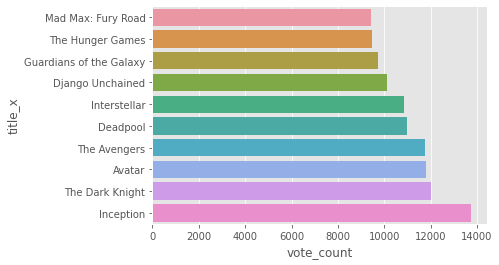

In [224]:
sns.barplot(data=df4,x=df4['vote_count'],y=df4['title_x'])

In [226]:
new_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              4803 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4803 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4803 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4803 non-null   object 
 14  spoken_languages      4803 non-null   object 
 15  status               

In [229]:
x=new_movie['release_date'][1]

In [230]:
x

'2007-05-19'

In [231]:
s=x.split('-')[0]

In [232]:
s

'2007'

In [258]:
def getYear(data):
  for index, value in zip(data.index, data['release_date']):
    s=value.split('-')
    data.loc[index,'release_date']= s[0]
    


In [312]:
getYear(new_movie)

In [371]:
df5= pd.DataFrame(new_movie)

In [374]:
df5=df5.groupby('release_date', dropna=True)

In [375]:
df5=df5.size()

In [376]:
df5=df5.sort_values()

In [377]:
df5.describe()

count     91.000000
mean      52.780220
std       79.978303
min        1.000000
25%        3.000000
50%        9.000000
75%       51.000000
max      247.000000
dtype: float64

In [378]:
df5.tail(10)

release_date
2012    208
2015    216
2005    217
2011    223
2010    225
2008    227
2013    231
2006    237
2014    238
2009    247
dtype: int64

In [379]:
df5=df5
df5.reset_index(drop=True, inplace=True)

[1]: Reference to use cosine similarity and count vectorizer: https://medium.com/web-mining-is688-spring-2021/content-based-movie-recommendation-system-72f122641eab 
[2]: Dataset: https://www.kaggle.com/tmdb/tmdb-movie-metadata 
[3]: https://www.analyticsvidhya.com/blog/2020/08/recommendation-system-k-nearest-neighbors/ 
[4]: Understanding different types of recommender systems and their implementation using python : https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system 
[5]: For using the json.loads library to deconstruct the json column dataframe: 
https://stackoverflow.com/questions/60174271/how-to-apply-json-loads-to-each-row-in-pandas-df 